# <span style="color:blue"> Exclusion-from-RAW-or-mzML notebook for IODA</span>

**Purpose**: The IODA exclusion-from-RAW-or-mzML notebook allows to generate exclusion lists for Iterative Optimise Data Acquisition (IODA) of fragmentation spectra in LC-MS.

**Usage**: This notebook requires the user to provide a RAW or mzML of a "blank" sample.  All the ions detected will be added to exclusion list. The IODA-exclusion workflow formats the ions for exclusion with XCalibur or [MaxQuant.Live]. If you need to generate an mzTab, we recommend using the dedicated [IODA exclusion-from-RAW_or_mzML notebook](IODA_exclusion_from_RAW_or_mzML.ipynb) using OpenMS. 

**Documentation**: Please refer to the [documentation page](link) for more informations on the for IODA exclusion-from-RAW-or-mzML worklow.

**Instructions**: Follow the instructions below and run the notebook cells accordingly.

### Step 0 - Run your LC-MS mass spectrometry experiment

Analyse your "blank" sample by LC-MS. It could data from MS1 scans only. But it must be the same chromatographic and MS conditions (same source parameters).

<span style="color:brown">**IMPORTANT**</span>: The chromatographic and mass spectrometry conditions must be identical for all the samples analyzed by IODA. The chromatographic system must be well equilibrated. Note that there is no need for MS/MS acquisition for the blank sample, as feature detection/alignment with OpenMS is performed only on the MS1 level. However, the following IODA-exclusion experiment(s) requires MS/MS acquisition.

### Step 1 - Upload the RAW or mzML file

##### <span style="color:brown">Method 1 - Upload your RAW or mzML file</span>

Upload your RAW or mzML file on the MyBinder server with the Jupyter lab interface (drag-and-drop the file in the left panel or use the "Upload" icon). 

##### <span style="color:brown">Method 2 - Web-sharing links (mzML only)</span>
We support retrieving only mzML file from the following cloud sharing services:
> **Google Drive** : copy the sharing the link (make sure the sharing setting is set to 'Anyone with the link can download').

> **MassIVE/GNPS repository** : copy the link for each files.

### Step 2 - Specify the link or path to the RAW or mzML file
**Specificy the filename of the uploaded blank sample RAW/mzML in the cell below.** 


The string for the link/path must be between parenthesis, such as: "`my_blank_sample.raw`" or `"input_folder/my_blank_sample.mzML"`. \
You can use the following file for testing: \
`input_MS_file = "tests/raw/exclusion/blank_pos.raw"`

<!--These are various test jobs 
#input_MS_file = "7A12_SPE_Blank.raw"
#input_MS_file = "tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML"
#input_MS_file = "tests/PPL/exclusion/20190701_PPLBlank_DOM_1.mzML"
#input_MS_file = "https://drive.google.com/file/d/11p2Jau2T-gCQb9KZExWdC7dy8AQWV__l/view?usp=sharing"
#input_MS_file = "ftp://massive.ucsd.edu/MSV000083306/peak/QE_C18_mzML/QEC18_blank_SPE_20181227092326.mzML"
-->

In [1]:
input_MS_file = "blank_sample.raw"
input_MS_file = "tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML"

### Step 3 - Run the OpenMS workflow

**Specify the variables of the OpenMS 
Feature Finder Metabolomics (FFM) tool**

Note that the OpenMS workflow uses two parallel FFM tools. One FFM is optimised for the detection of narrow LC-MS features/peaks, while the other FFM is optimised for large LC-MS features/peaks. The minimum peak height for detected feature is set to 3 fold the noise level set.

Parameters should be optimised depending on the sample complexity and acquisition parameters. You can visualize the data of your mzML file with OpenMS/TOPPView to decide upon the best noise level, see the [documentation](documentation.ipynb).

##### Maximum mass error
> `ppm_error`: the maximum mass error allowed for the feature detection. Used in both FFM tools. A value of 10 ppm is recommended for a resolution of 35K or less (must be an integer/float).

##### Noise level
> `narrow_feature_noise`: this is the MS1 noise level for the detection of narrow LC-MS features. The default value is 3E5 (must be an integer/float, can be in scientific format). 

> `large_feature_noise`: this is the MS1 noise level for the detection of large LC-MS features. The default value is 5E5 (must be an integer/float, can be in scientific format).

TIPS: If your sample has a lot of features, increase the noise levels to limit the number of ions that are detected for subsequent exclusion.

In [2]:
ppm_error = 10
narrow_feature_noise = 5E5
large_feature_noise = 5E5

**Run the cells below to start the OpenMS processing**. Do not change the content. Look for the log printed.

In [4]:
%%javascript
document.title='IODA MS notebooks'

<IPython.core.display.Javascript object>

In [5]:
%load_ext line_profiler
%load_ext memory_profiler

In [6]:
from IODA_run_pyOpenMS_exclusion import *
#%lprun -f IODA_exclusion_workflow(input_MS_file,ppm_error,narrow_feature_noise,large_feature_noise)
#%memit IODA_exclusion_workflow(input_MS_file,ppm_error,narrow_feature_noise,large_feature_noise)
IODA_exclusion_workflow(input_MS_file,ppm_error,narrow_feature_noise,large_feature_noise)

rm: cannot remove 'OpenMS_workflow/logfile_IODA_OpenMS_from_mzML.txt': No such file or directory
rm: cannot remove 'download_results/IODA_OpenMS_results.zip': No such file or directory
rm: cannot remove 'OpenMS_workflow/OpenMS_output/OPENMS_out/': No such file or directory
[I 230316 14:18:20 IODA_run_pyOpenMS_exclusion:34] 2023-03-16 14:18:20.156858
[I 230316 14:18:20 IODA_run_pyOpenMS_exclusion:35] STARTING the IODA-exclusion WORKFLOW with OpenMS
[I 230316 14:18:20 IODA_run_pyOpenMS_exclusion:36] ======
[I 230316 14:18:20 IODA_run_pyOpenMS_exclusion:37] Getting the mzML, please wait ...
[I 230316 14:18:20 IODA_run_pyOpenMS_exclusion:76] This is the input file path: tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML
[I 230316 14:18:20 IODA_run_pyOpenMS_exclusion:99] The mzML file was found !
[I 230316 14:18:20 IODA_run_pyOpenMS_exclusion:101] Copying the mzML to the OpenMS input folder
[I 230316 14:18:20 IODA_run_pyOpenMS_exclusion:103] ======
[I 230316 14:

Mass Trace Detection:  OpenMS_workflow/OpenMS_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML
Progress of 'mass trace detection':
Elution Peak Detection:  OpenMS_workflow/OpenMS_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML
-- done [took 0.61 s (CPU), 0.61 s (Wall)] -- 
Progress of 'elution peak detection':
-- done [took 0.06 s (CPU), 0.01 s (Wall)] -- 
Feature Detection:  OpenMS_workflow/OpenMS_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML
Progress of 'assembling mass traces to features':
-- done [took 0.01 s (CPU), 0.00 s (Wall)] -- 
Mass Trace Detection:  OpenMS_workflow/OpenMS_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML


[I 230316 14:18:22 IODA_run_pyOpenMS_exclusion:245] ======
[I 230316 14:18:22 IODA_run_pyOpenMS_exclusion:246] "Finished feature detection of large features"
[I 230316 14:18:22 IODA_run_pyOpenMS_exclusion:247] ======
[I 230316 14:18:22 IODA_run_pyOpenMS_exclusion:409] ======
[I 230316 14:18:22 IODA_run_pyOpenMS_exclusion:410] Completed the pyOpenMS workflow
[I 230316 14:18:22 IODA_run_pyOpenMS_exclusion:411] ======
[I 230316 14:18:22 IODA_run_pyOpenMS_exclusion:412] Zipping up the OpenMS workflow results ...


Progress of 'mass trace detection':Elution Peak Detection:  OpenMS_workflow/OpenMS_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML

-- done [took 0.02 s (CPU), 0.02 s (Wall)] -- 
Progress of 'elution peak detection':
-- done [took 0.13 s (CPU), 0.03 s (Wall)] -- 
Feature Detection:  OpenMS_workflow/OpenMS_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML
Progress of 'assembling mass traces to features':
-- done [took 0.00 s (CPU), 0.00 s (Wall)] -- 


[I 230316 14:18:22 IODA_exclusion_workflow:160] All files zipped successfully!
[I 230316 14:18:22 IODA_run_pyOpenMS_exclusion:415] ======
[I 230316 14:18:22 IODA_run_pyOpenMS_exclusion:416] NOW YOU CAN CONTINUE WITH THE REST OF THE WORKFLOW


### Step 4 (Optional) - Download the results of the OpenMS processing
(Optional) Download the OpenMS result files at
[download_results/IODA_exclusion_list_from_OpenMS.zip](download_results/IODA_exclusion_list_from_OpenMS.zip). \
The performance of OpenMS processing (featureXML or consensusXML) can be visualized in TOPPView. [See the documentation](documentation.ipynb). \
NB: Isotopic ions are not grouped and are treated as separate peaks/features.

### Step 5 - Specify the parameters of the IODA-exclusion workflow
**Specify the parameters value in the cell below**

>`min_intensity`: the minimum intensity for the ion/feature to be retained in the exclusion list (peak heigh intensity).

>`rt_exclusion_margin`: define the side margin for the retention time range exclusion. Note that this value is added to each side of the actual feature/ion retention time range. The units are seconds.

In [7]:
min_intensity = 500000
rt_exclusion_margin = 10

### Step 6 - Run the IODA-exclusion workflow

Simply run the cell below to start the IODA-exclusion workflow.

In [8]:
from IODA_exclusion_workflow import *
#%lprun -f make_exclusion_from_dfs(input_MS_file, min_intensity, rt_exclusion_margin)
#%memit make_exclusion_from_dfs(input_MS_file, min_intensity, rt_exclusion_margin)
make_exclusion_from_dfs(input_MS_file, min_intensity, rt_exclusion_margin)

rm: cannot remove 'results': No such file or directory
rm: cannot remove 'download_results/IODA_exclusion_results.zip': No such file or directory
mkdir: cannot create directory ‘download_results’: File exists
[I 230316 14:18:25 IODA_exclusion_workflow:174] 2023-03-16 14:18:25.701648
rm: cannot remove 'results/logfile.txt': No such file or directory
[I 230316 14:18:25 IODA_exclusion_workflow:179] ======
[I 230316 14:18:25 IODA_exclusion_workflow:180] Starting the IODA-exclusion workflow
[I 230316 14:18:25 IODA_exclusion_workflow:181] The source of the mzML file is: OpenMS_workflow/OpenMS_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML
[I 230316 14:18:25 IODA_exclusion_workflow:182] Input dataframe for narrow feature: OpenMS_workflow/OpenMS_output/Euphorbia_rogers_latex_Blank_MS1_2uL_narrow.csv
[I 230316 14:18:25 IODA_exclusion_workflow:183] Input dataframe for large feature: OpenMS_workflow/OpenMS_output/Euphorbia_rogers_latex_Blank_MS1_2uL_large.csv
[I 230316 14:18:25 IODA_exclusion_wo

### Step 7 - Visualize the results

Run the cell below to view the scatter plots. These plots can help you adjusting parameters to your sample and experimental conditions.

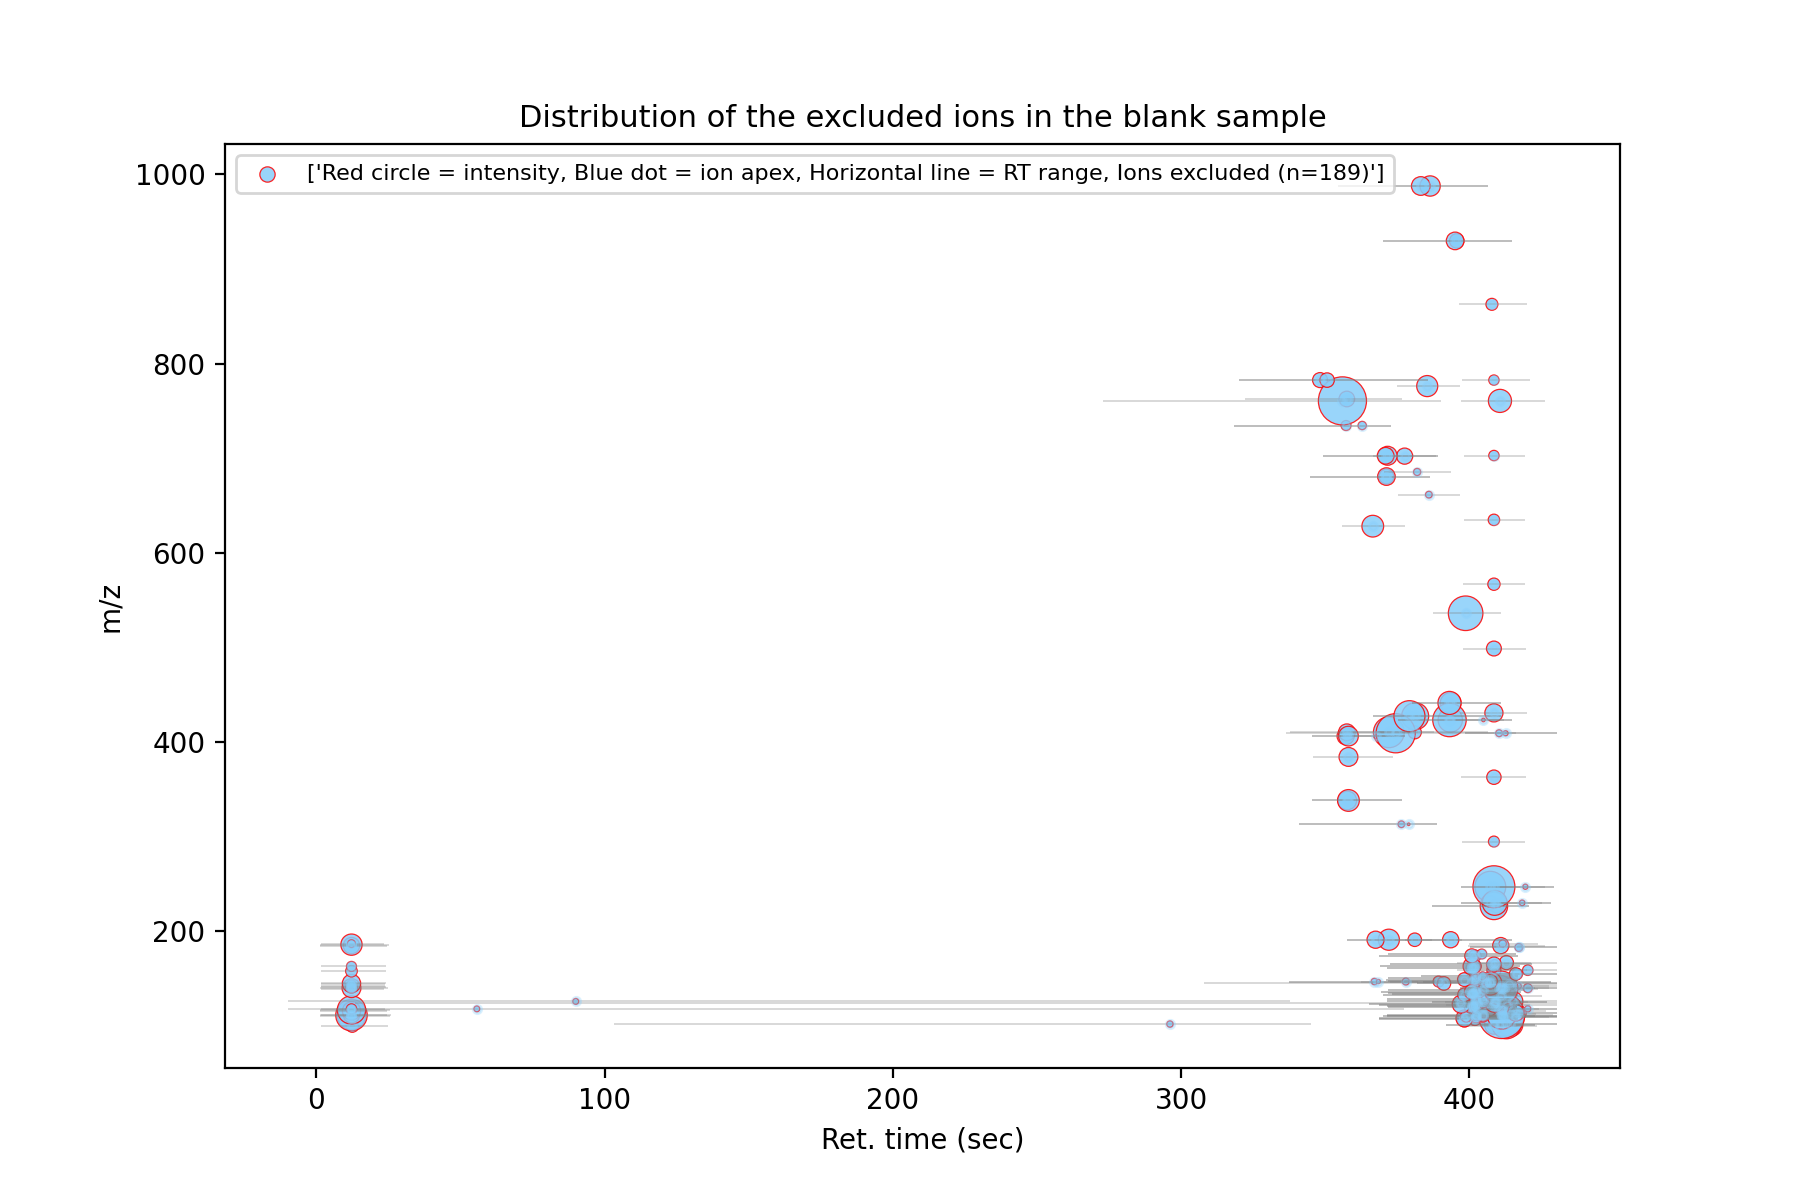

In [9]:
from IPython.display import Image
Image("results/plot_exclusion_RT_range_plot.png")

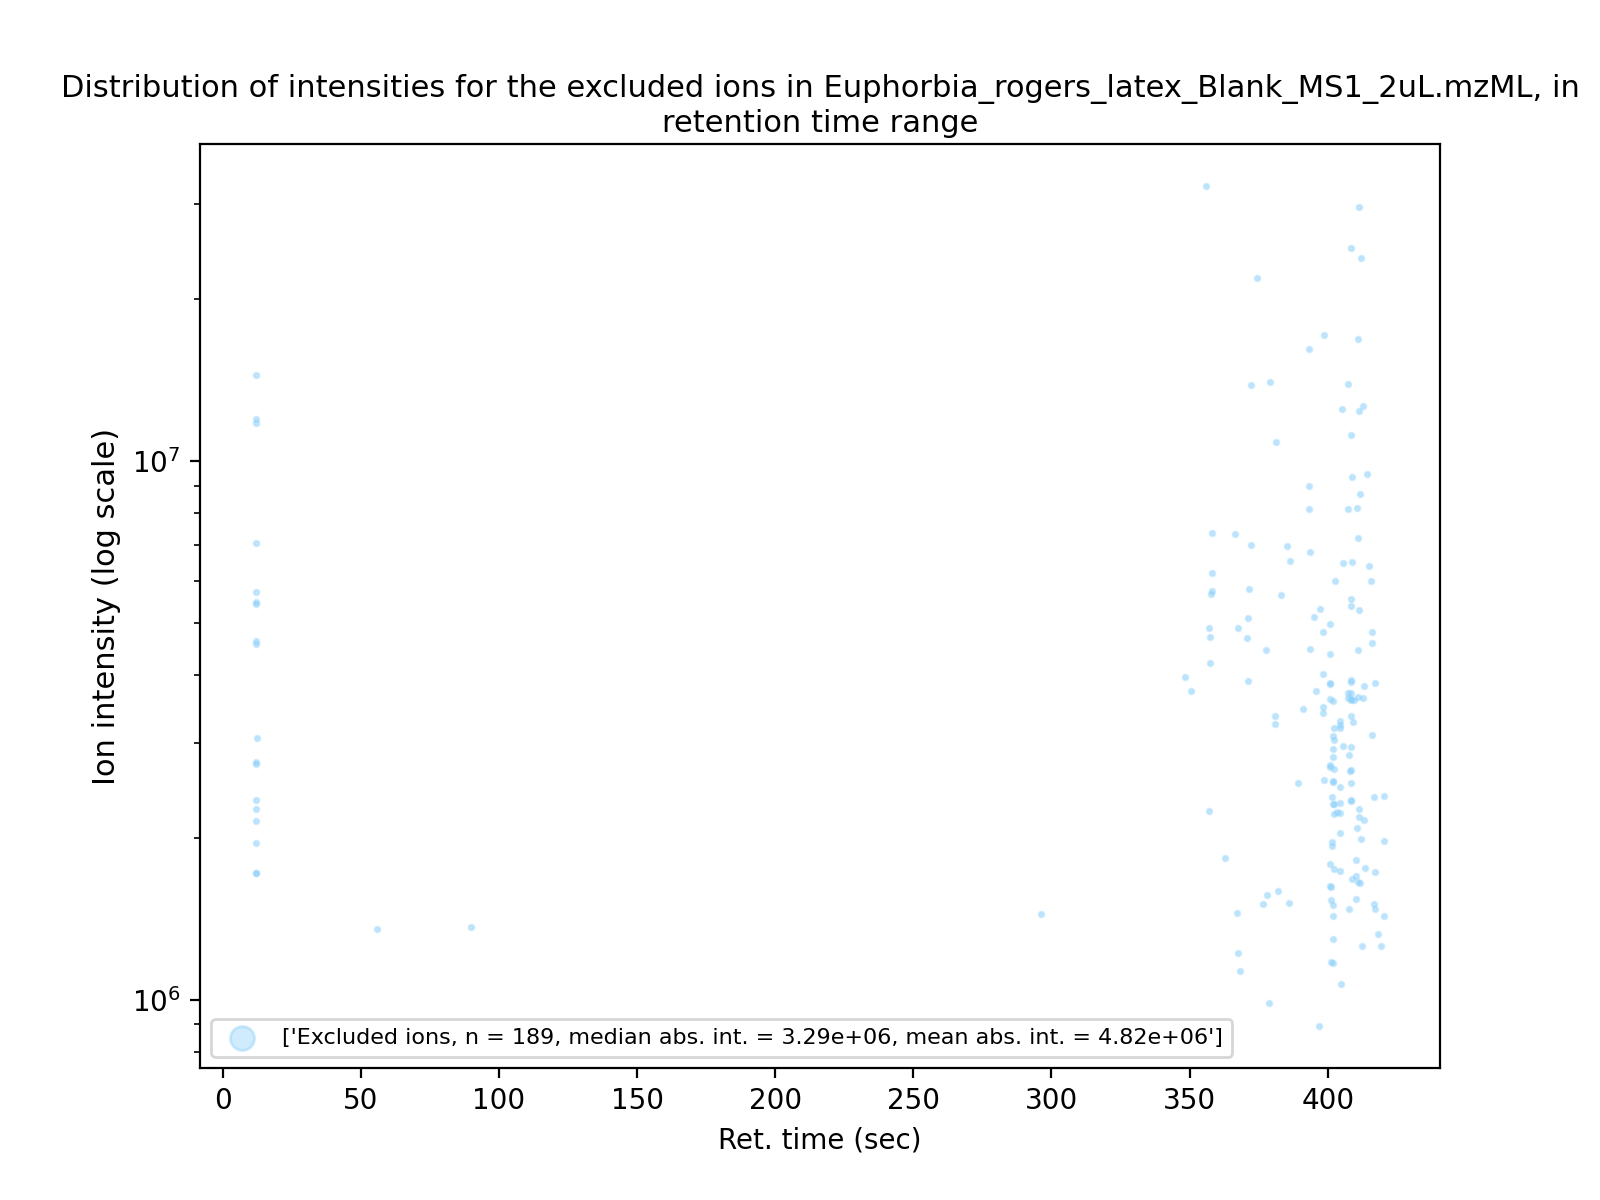

In [10]:
Image("results/plot_exclusion_scatter_RT.png")

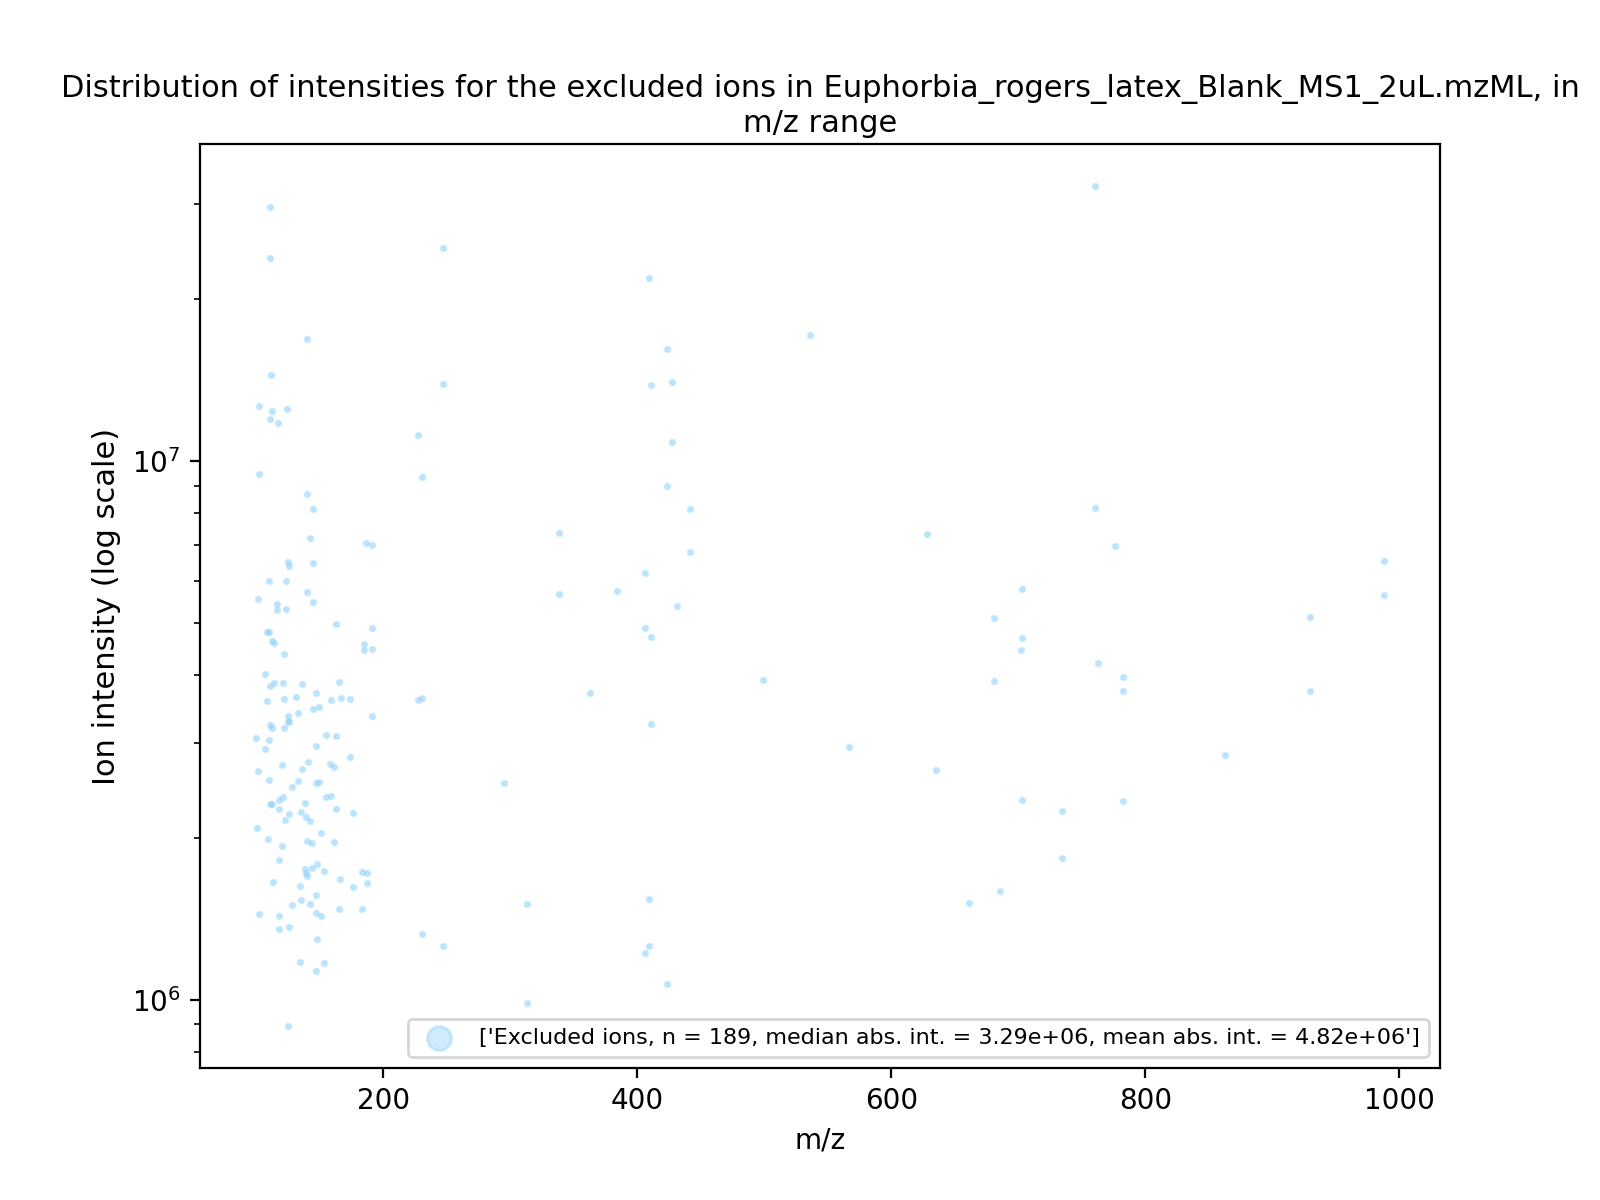

In [11]:
Image("results/plot_exclusion_scatter_MZ.png")

### Step 8 - Examine the results

**Visualize** : Run the cell below to show the scatter plot for the IODA-exclusion workflow results. The scatter plots shows the distribution of the ions excluded in the blank sample based on the parameters defined. Horizontal lines are indicating the retention time range for the ions/features excluded. 

- Examine the IODA-exclusion worflow log and the plots in order to verify that the *min_intensity* parameter is adapted to exclusion level you want to apply, and your sample(s) complexity. 
- You could also rerun the OpenMS processing with different parameter values *narrow_feature_noise* and *large_feature_noise*. The OpenMS processing parameters can be adjusted locally for optimal feature detection. [See the documentation](documentation.ipynb).

### Step 9 - Download the results

Run the cell below to display the download links for the:
- **IODA-exclusion workflow results** -> `download_results/IODA_exclusion_results.zip`

- (Optional) - **The OpenMS results file** -> 
`download_results/IODA_OpenMS_results.zip`.
 You can open the featureXML files with [OpenMS/TOPPView](https://github.com/OpenMS/OpenMS/releases) to inspect the quality of feature detection and alignment.

In [12]:
from download_link_jupyterlab import DownloadFileLink
display(DownloadFileLink('download_results/IODA_exclusion_results.zip', file_name='download_results/IODA_exclusion_results.zip', link_text='Click here to download the IODA exclusion workflow results from download_results/IODA_exclusion_results.zip'))
display(DownloadFileLink('download_results/IODA_OpenMS_results.zip', file_name='download_results/IODA_OpenMS_results.zip', link_text='(Optional) Click here to download the OpenMS results files from download_results/IODA_OpenMS_results.zip'))

/home/jovyan/download_results/IODA_exclusion_results.zip

/home/jovyan/download_results/IODA_OpenMS_results.zip

### Step 10 - Prepare your IODA experiment
Prepare the IODA experiment. For instructions on how to load and configure an target/inclusion list with XCalibur or MaxQuant.Live please refer to [the documentation](documentation.ipynb).